## Aufgabe 2

d) Wie gut ist die Accuracy auf den Trainings- und auf den Testdaten?
*Trainingsdaten: 91,7%*
*Testdaten: 89,6%* 

e) Wie lange hat das Training einer Epoche in etwa gedauert? Dauert es länger, in etwa gleich lang oder weniger lang im Vergleich zu Aufgabe 1xxx?
*Das Training einer Epoche dauert 6s und damit deutlich länger als in der ersten Aufgabe (1-2s).*

f) Optional: Trainieren Sie das Netz erneut, diesmal aber auf der GPU, die Sie bei Google Colab unter Edit/Notebook Settings aktivieren können. Wie lange hat das Training einer Epoche jetzt in etwa gedauert? Übernehmen Sie auch hier die Werte in die Ausarbeitung.
*Ohne GPU in Colab: 30s*
*Mit T4 GPU in Colab: 7s*

g) Lassen Sie sich Anzahl der Gewichte ausgeben. Rechnen Sie die ausgegebene Anzahl nach und übernehmen Sie die Anzahl und den Rechenweg in die Auswertung.
*Gesamtanzahl: 17158 Gewichte*
*1. Conv: Maske hat die Größe 3x3 und nur einen Input-Channel -> 3 * 3 * 1 = 9. 9 + 1 Bias = 10 Gewichte. Die Layer hat 8 Ausgabe-Channel, deshalb insgesamt 8 * 10 = 80 Gewichte.*
*2. Conv: Maske hat wieder die Größe 3x3, aber 8 Input-Channel -> 3 * 3 * 8 = 72. 72 + 1 Bias = 73 Gewichte. Die Layer hat 16 Ausgabe-Channel, also insgesamt 16 * 73 = 1168 Gewichte.*
*1. Dense: hat 7 * 7 * 16 = 784 Input-Werte und 20 Neuronen -> 784 * 20 + 20 Bias = 15700 Gewichte*
*2. Dense: hat 20 Input-Werte und 10 Neuronen -> 20 * 10 + 10 = 210 Gewichte*

h) Vergleichen Sie die Resultate mit denen des Fully-Connected Netzes aus der vorigen Aufgabe in Bezug auf Accuracy auf den Trainings- und auf den Testdaten, ungefähre Trainingszeiten je Epoche und Anzahl der Gewichte.
*Die Accuracy ist sehr ähnlich, jedoch ist das CNN leicht besser (~1 Prozentpunkt)*
*Das Training dauert je Epoche etwa 4mal so lange bei den CNNs*
*Das Model mit CNNs hat 6mal weniger Gewichte als das vorherige Modell.*

i) Fügen Sie eine Dropout-Layer (siehe Foliensatz zu Deep-Feedforward-Networks) direkt nach der letzten MaxPool-Layer hinzu mit einer Dropout-Rate von 0.2.
Wie ändert sich die Trainings- und Test-Accuracy?
*Training: 90,4%*
*Test: 89,6%*

j) Trainieren Sie das Modell für weitere 10 Epochen. Das geht am schnellsten, wenn Sie einfach die model.fit Zeile nochmals ausführen: Das Netz wird nicht neu initialisiert, sondern ausgehend von dem aktuellen Trainingszustand (also nach den ersten 10 Epochen) weitertrainiert.
*Training: 91,6%*
*Test: 90,3%*

# Basic classification: Classify images of clothing

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.12.0


In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Preprocess the data

In [4]:
train_images = train_images / 255.0

test_images = test_images / 255.0

## Build the model

Building the neural network requires configuring the layers of the model, then compiling the model.

In [5]:
single_input_shape = train_images[0].shape
single_input_shape + (1,)

(28, 28, 1)

In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.Reshape(target_shape=single_input_shape + (1,), input_shape=single_input_shape),
    tf.keras.layers.Conv2D(filters=8, kernel_size=(3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2, padding='valid'),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2, padding='same'),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=20, activation='relu'),
    tf.keras.layers.Dense(units=10)
])

### Compile the model

In [7]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 28, 28, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 8)         80        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 16)        1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 16)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 7, 7, 16)          0

## Train the model

In [9]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
   1/1875 [..............................] - ETA: 5:24 - loss: 2.3163 - accuracy: 0.1562

2023-12-14 10:20:01.711351: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1875/1875 [==============================] - 7s 3ms/step - loss: 0.5706 - accuracy: 0.7941
Epoch 2/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3889 - accuracy: 0.8614
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3420 - accuracy: 0.8772
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3176 - accuracy: 0.8870
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3003 - accuracy: 0.8914
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2874 - accuracy: 0.8950
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2788 - accuracy: 0.8994
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2692 - accuracy: 0.9010
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2615 - accuracy: 0.9035
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2556 - accurac

In [10]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2475 - accuracy: 0.9081
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2460 - accuracy: 0.9086
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2389 - accuracy: 0.9117
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2340 - accuracy: 0.9126
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2332 - accuracy: 0.9145
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2276 - accuracy: 0.9144
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2228 - accuracy: 0.9168
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2199 - accuracy: 0.9174
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2168 - accuracy: 0.9200
Epoch 10/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.216

### Evaluate accuracy

In [11]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.2574 - accuracy: 0.9075 - 731ms/epoch - 2ms/step

Test accuracy: 0.9075000286102295


### Make predictions

In [12]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [13]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [14]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100 * np.max(predictions_array),
                                         class_names[true_label]),
               color=color)


def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

### Verify predictions

With the model trained, you can use it to make predictions about some images.

In [15]:
neg_predict_index = predictions.argmax(axis=1) != test_labels
neg_predict = predictions[neg_predict_index]
neg_test_labels = test_labels[neg_predict_index]
neg_test_images = test_images[neg_predict_index]

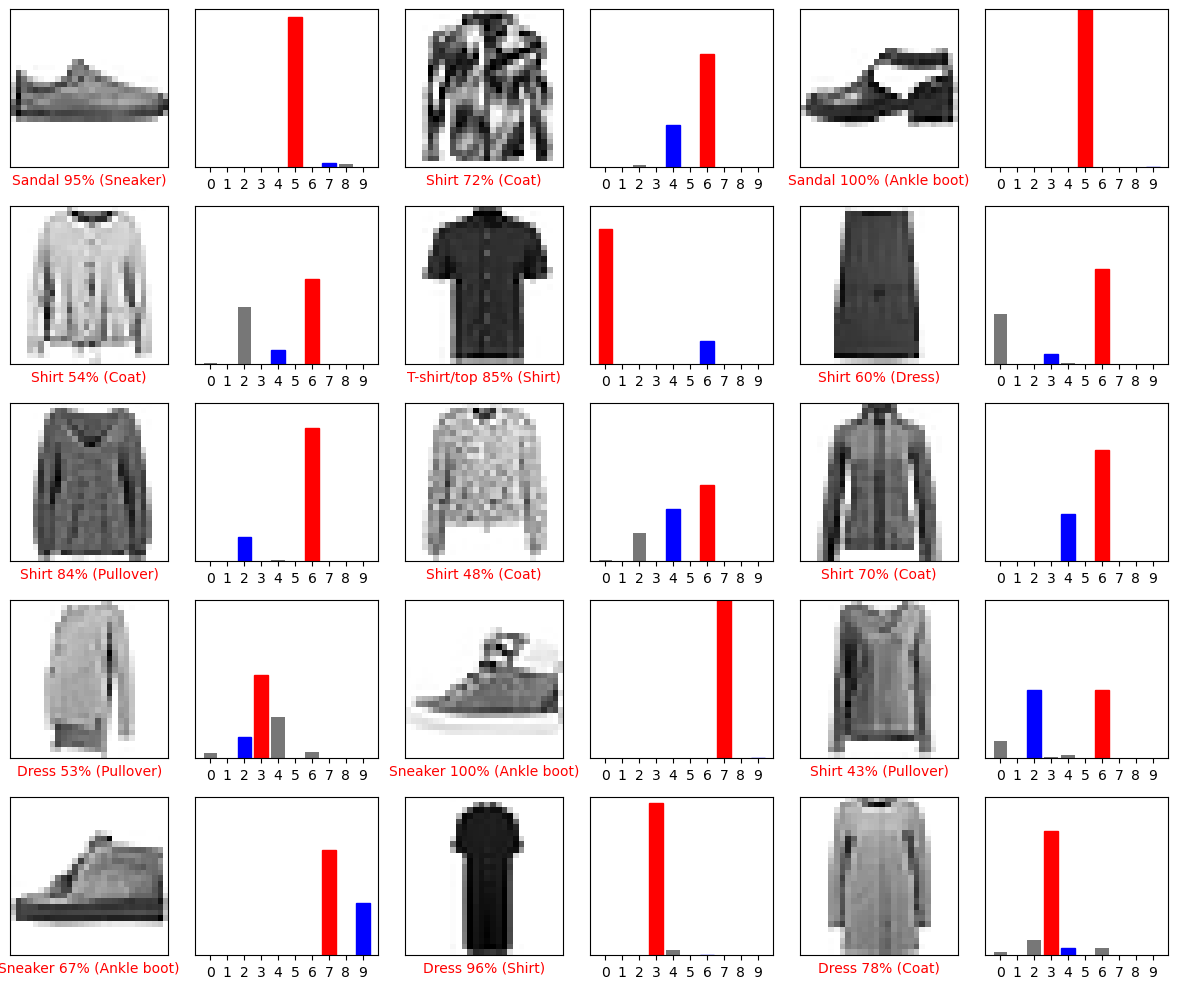

In [16]:
# Plot the first 15 WRONG test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, neg_predict[i], neg_test_labels, neg_test_images)
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(i, neg_predict[i], neg_test_labels)
plt.tight_layout()
plt.show()

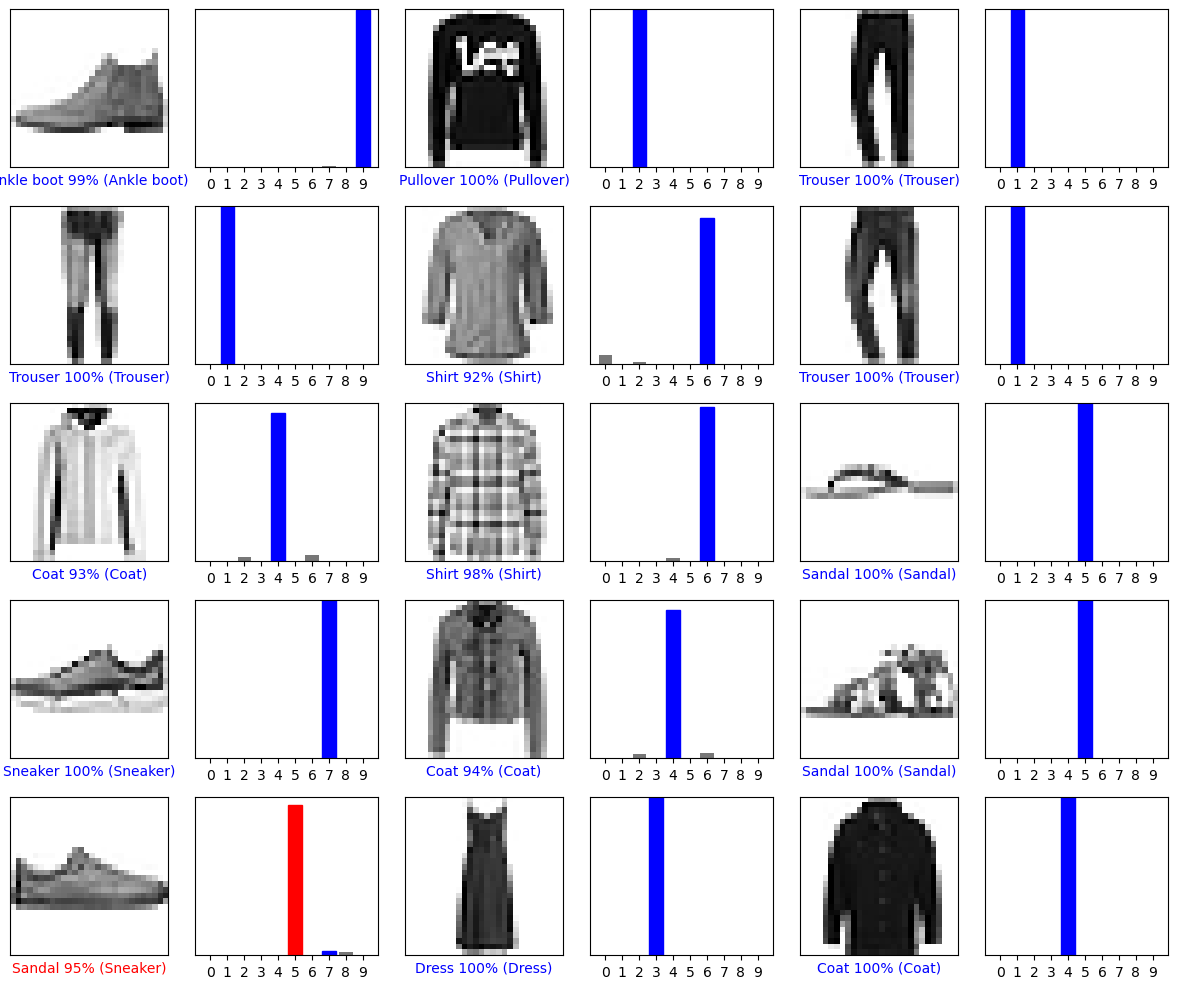

In [17]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## Use the trained model

Finally, use the trained model to make a prediction about a single image.

In [18]:
img = test_images[1]

# Add the image to a batch where it's the only member.
img = (np.expand_dims(img, 0))

print(img.shape)

(1, 28, 28)


Now predict the correct label for this image:

In [19]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 8ms/step
[[2.7647876e-04 7.4209866e-12 9.9928111e-01 1.4149089e-07 3.7875530e-04
  1.4518970e-12 6.3571373e-05 2.7691814e-13 2.3809816e-09 1.0241646e-09]]


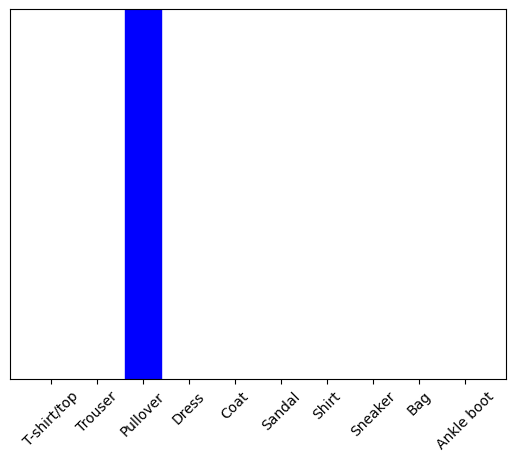

In [20]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

`tf.keras.Model.predict` returns a list of lists—one list for each image in the batch of data. Grab the predictions for our (only) image in the batch:

In [21]:
np.argmax(predictions_single[0])

2

And the model predicts a label as expected.

To learn more about building models with Keras, see the [Keras guides](https://www.tensorflow.org/guide/keras).

In [22]:
model.save("./assets/model_8_2.keras")